# Step1:- Dataset Understanding.

### Load all the packages.

In [118]:
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np  # linear algebra
import sklearn
import matplotlib.pyplot as plt  # this is used for the plot the graph 
import seaborn as sns   # used for plot interactive graph.
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

## ii)Loading Dataset

In [119]:
df = pd.read_csv(r'E:/default of credit card clients_Nov3.csv')

## iii)Dataset Analysis:-

In [120]:
#Shape of the dataset
df.shape

(30001, 25)

In [121]:
#column names in list 
df.columns.values

array(['Unnamed: 0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9',
       'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18',
       'X19', 'X20', 'X21', 'X22', 'X23', 'Y'], dtype=object)

In [122]:
#Describe the dataset to understand the basic statistics of the dataset
df.describe()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001,...,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001
unique,30001,82,3,8,5,57,12,12,12,12,...,21549,21011,20605,7944,7900,7519,6938,6898,6940,3
top,8543,50000,2,2,2,29,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
freq,1,3365,18112,14030,15964,1605,14737,15730,15764,16455,...,3195,3506,4020,5249,5396,5968,6408,6703,7173,23364


In [123]:
#Print the first three rows of the dataset
df.head(3)

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1


## iv)Target Identification

In our case by analyzing the dataset we can understand that the column "Y" i.e.(default payment next month) is our TARGET VARIABLE

So, TARGET VARIABLE = default payment next month i.e 'Y'

In [124]:
df['Y'].value_counts()

0                             23364
1                              6636
default payment next month        1
Name: Y, dtype: int64

## Visualize the count of Credit Default

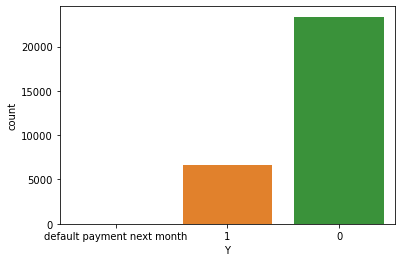

In [125]:
sns.countplot(df['Y'])

## Let’s try to find the relation between some Features and  Target Variable/output. 

## 1) Let’s take a look at the Credit Default By Limit Balance

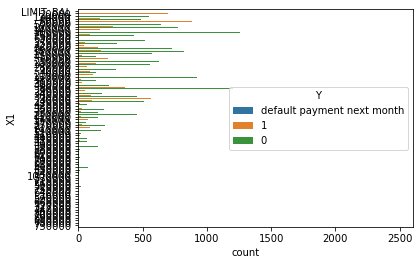

In [126]:
#Visualize the Credit Default by Limit Balance
sns.countplot(y='X1', hue='Y',data = df)

## 2) Let’s take a look at the Credit Default By SEX

In the Graph 1-MALE and 2-FEMALE on X-Axis
While Bar Orange denotes 'Credit Default' and Green is 'No Credit Default' 


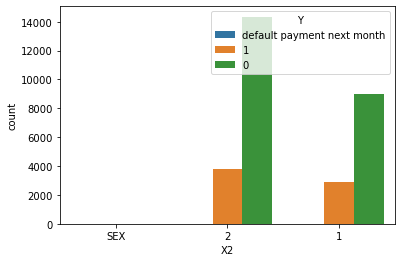

In [127]:
#Visualize the churn count for the State
sns.countplot(x='X2', hue='Y', data = df)
print("In the Graph 1-MALE and 2-FEMALE on X-Axis")
print("While Bar Orange denotes 'Credit Default' and Green is 'No Credit Default' ")

## 3) Let’s take a look at the Credit Default By Education

On X- Axis Education (1 = graduate school; 2 = university; 3 = high school; 4 = others)
While Bar Orange denotes 'Credit Default' and Green is 'No Credit Default' 


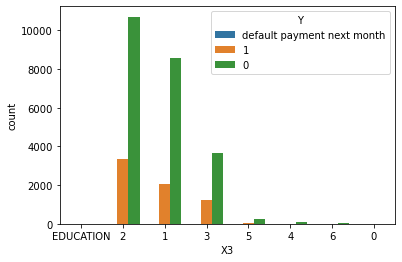

In [128]:
#Visualize the Credit Default By Education
sns.countplot(x='X3', hue='Y', data = df)
print("On X- Axis Education (1 = graduate school; 2 = university; 3 = high school; 4 = others)")
print("While Bar Orange denotes 'Credit Default' and Green is 'No Credit Default' ")

## 4) Let’s take a look at the Credit Default By Marraige

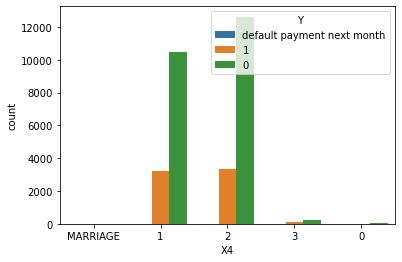

In [129]:
sns.countplot(x='X4', hue='Y', data = df)

## 5) Let’s take a look at the Credit Default By Age

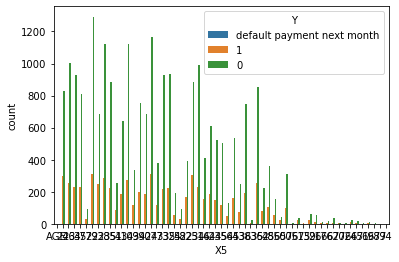

In [130]:
sns.countplot(x='X5', hue='Y', data = df)

## Mean , Standard Deviation and Percentile Of Dataset

## 1)Mean Of Dataset

In [131]:
from numpy import mean
# summarize
print( "Mean of the Dataset:",mean(df))

Mean of the Dataset: Series([], dtype: float64)


## 2)Standard Deviation Of Dataset

In [132]:
from numpy import std
print("Standard Deviation of Dataset:",std(df))

Standard Deviation of Dataset: Series([], dtype: float64)


## 3)Percentile Of Dataset

In [133]:
from numpy import percentile
print("Percentile Of Dataset:",percentile(df,75))

TypeError: can't multiply sequence by non-int of type 'float'

## v)Feature Identification
◦ In our case by analyzing the dataset, we can understand that the columns like
"ID" might be irrelevant as they are not dependent on call usage
pattern.

In [134]:
#Remove the unnecessary column "ID"
cleaned_df = df = df.drop('Unnamed: 0', axis=1)


Let’s take a look at the number of rows and columns in the new data set.

In [135]:
cleaned_df.shape

(30001, 24)

I can see that the new data set contains 30001 rows of data and 24 columns 
(one less than the number of columns in the original data set).

# 

# Step2:- Pre-Processing of the Data.

## i)Categorical Data

Identify the categorical variable in the data and print it. (if any

In [136]:
#Check the Categorical Data
cleaned_df.dtypes

X1     object
X2     object
X3     object
X4     object
X5     object
X6     object
X7     object
X8     object
X9     object
X10    object
X11    object
X12    object
X13    object
X14    object
X15    object
X16    object
X17    object
X18    object
X19    object
X20    object
X21    object
X22    object
X23    object
Y      object
dtype: object

## ii)Handling Categorical Data

In [137]:
#Convert all the non-numeric columns to numerical data types
for column in cleaned_df.columns:
   if cleaned_df[column].dtype == np.number:
      continue
   cleaned_df[column] = LabelEncoder().fit_transform(cleaned_df[column])

In [138]:
#Check the new data set data types
cleaned_df.dtypes

X1     int32
X2     int32
X3     int32
X4     int32
X5     int32
X6     int32
X7     int32
X8     int32
X9     int32
X10    int32
X11    int32
X12    int32
X13    int32
X14    int32
X15    int32
X16    int32
X17    int32
X18    int32
X19    int32
X20    int32
X21    int32
X22    int32
X23    int32
Y      int32
dtype: object

In [139]:
#Show the first 5 rows of the new data set
cleaned_df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,81,2,7,4,56,11,11,11,11,10,...,21548,21010,20604,7943,7899,7518,6937,6897,6939,2
1,13,1,2,1,3,4,4,0,0,1,...,377,384,414,0,6670,0,0,0,0,1
2,4,1,2,2,5,0,4,2,2,2,...,11832,11970,11338,0,4,4,4,0,2002,1
3,80,1,2,2,13,2,2,2,2,2,...,3619,3949,4233,1494,1476,4,4,4,4750,0
4,47,1,2,1,16,2,2,2,2,2,...,10317,10406,10457,2415,2535,645,336,262,4,0


## iii)Missing Values

In [140]:
#Check for na or missing data
cleaned_df.isna().sum()

X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
X17    0
X18    0
X19    0
X20    0
X21    0
X22    0
X23    0
Y      0
dtype: int64

## iv)Perform the Standardization

In [141]:
#Scale the cleaned data
X = cleaned_df.drop('Y', axis = 1) 
y = cleaned_df['Y']
#Standardizing/scaling the features
X = StandardScaler().fit_transform(X)

# Step3:-Applying Classification Algorithm

## i)Train and Test Data

In [142]:
#Split the data into 70% training and 30% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## ii)Logistic Regression Algorithm for Classification Problem-

In [143]:
#Create the model
model = LogisticRegression()
#Train the model
model.fit(x_train, y_train)

LogisticRegression()

In [144]:
score = model.score(x_train, y_train)
score2 = model.score(x_test, y_test)
print("Training set accuracy: ",'%.3f'%(score))  #Evaluating the classifier with score from train_data and train_label
print("Test set accuracy: ", '%.3f'%(score2))     #Evaluating the classifier with score from test_data and test_label

Training set accuracy:  0.801
Test set accuracy:  0.803


In [145]:
predictions = model.predict(x_test)     #Predict the response for test dataset

print("Accuracy / Predicted Score:",accuracy_score(y_test, predictions))  #Print the predicted score

Accuracy / Predicted Score: 0.8030218864570603


## Confusion Matrix
Each row of the matrix represents the instances in a predicted class while each column represents the instances 
in an actual class. The diagonals represent the classes that have been correctly classified. 
This helps as we not only know which classes are being misclassified but also what they are being misclassified as.

Text(91.68, 0.5, 'predicted label')

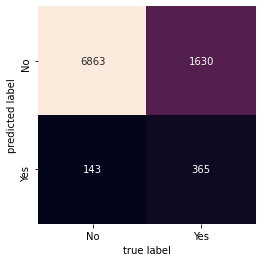

In [146]:
mat = confusion_matrix(y_test, predictions)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
          xticklabels=['No','Yes'],
          yticklabels=['No','Yes'] )
plt.xlabel('true label')
plt.ylabel('predicted label')

## Precision, Recall and F1-Score

In [147]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89      7006
           1       0.72      0.18      0.29      1995

    accuracy                           0.80      9001
   macro avg       0.76      0.58      0.59      9001
weighted avg       0.79      0.80      0.75      9001



## From the report,we can conclude that the recall of the model is about 98% meaning the model correctly identified about 98% of the customers Credit Default and missed about 2%.

## The precision of the model was about 81% and the f1-score was about 89%. The accuracy of the model was about 80%

## PRECISION=81%

## RECALL=98%

## F1-SCORE=89%

## ACCURACY=80%